In [2]:
import dive
import pymc3 as pm
import deerlab as dl
import numpy as np
%load_ext autoreload
%autoreload 2

/opt/anaconda3/envs/pymc_old/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
pm.__version__()



#need to make sure pm's version is pre 3.11.4

In [31]:
t = np.linspace(-0.1,5,300)

r = np.linspace(2,15,400)           # distance axis, nm
param = [5,0.2,0.4,5.4,0.15,0.6] # parameters for single-Gaussian model
P = dl.dd_gauss2(r,param)          # model distance distribution
lam = 0.4                       # modulation depth
B = dl.bg_hom3d(t,0.2,lam)         # background decay
K = dl.dipolarkernel(t,r,mod=lam,bg=B)  # kernel matrix

Vexp = K@P + dl.whitegaussnoise(t,0.01,seed=0)
def generatedata(Vexp):
    return t, Vexp, r, P,K


t, Vexp, r, P,K= generatedata(Vexp)

t1 = t
V1 = Vexp
r1 = r
P1 = P




In [35]:
pars = {"method": 'regularization', "r": np.linspace(2,7,50)}

MCMCparameters = {"draws": 5000,"tune": 2000, "chains": 4, "cores": 4}
NUTSpars = {"target_accept":0.95}

model_dictionary = dive.model(t1, V1, pars)

trace=  dive.sample(model_dictionary, MCMCparameters,  NUTSpars=NUTSpars, seed = None)
#trace,model =  dive.sample(podel, MCMCparameters,  NUTSpars=NUTSpars,seed = )

Time range:          300 points from -0.1 µs to 5 µs
Distance range:       50 points from 2 nm to 7 nm
Model:              regularization


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>randPnorm_posterior: [P]
>randTau_posterior: [tau]
>randDelta_posterior: [delta]
>NUTS: [lamb, V0, k]


/opt/anaconda3/envs/pymc_old/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_old/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_old/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/opt/anaconda3/envs/pymc_old/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 82 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The n

In [36]:
fit = dive.interpret(trace,model_dictionary)


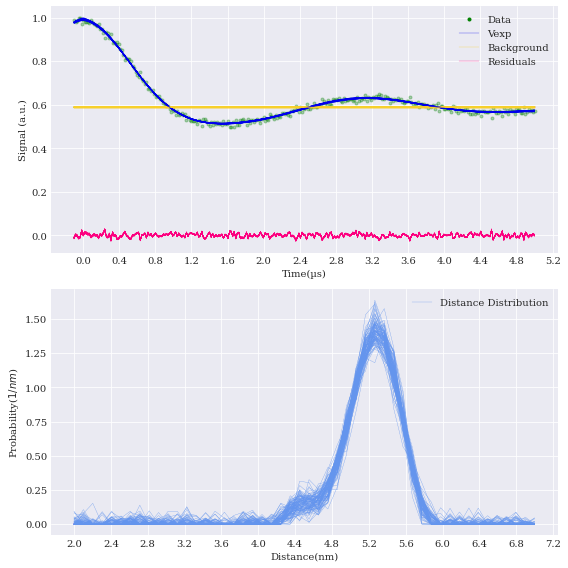

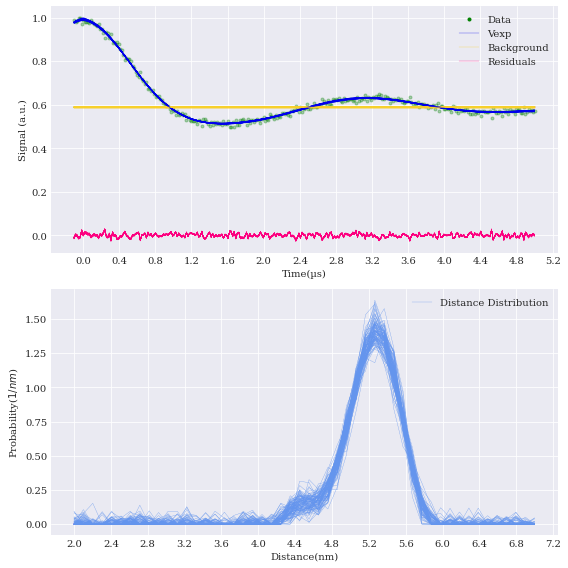

In [37]:
fit.plot(style = 'noodle')


/opt/anaconda3/envs/pymc_old/lib/python3.10/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


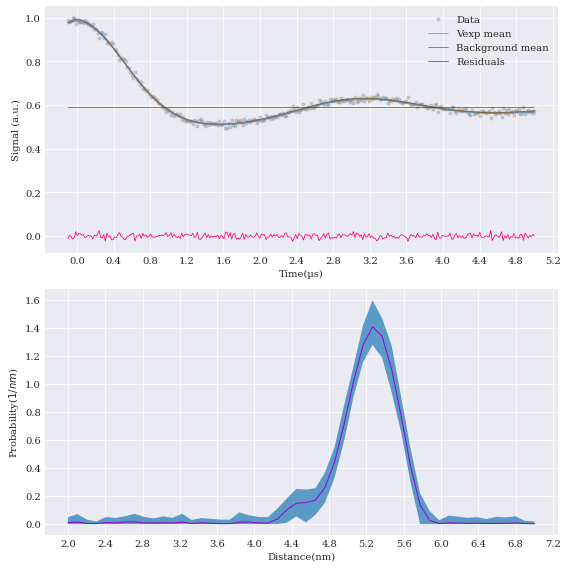

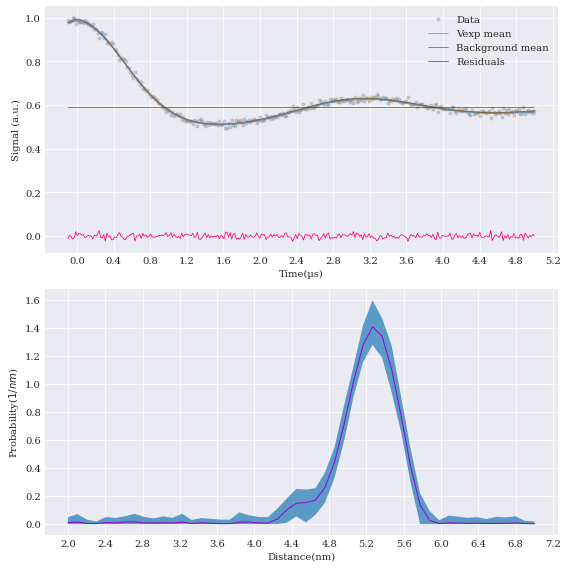

In [38]:
fit.plot(style = 'mean-ci')





